In [2]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/gauravduttakiit/vehicle-insurance-fraud-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dinidulochana
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/vehicle-insurance-fraud-classification


100%|██████████| 1.41G/1.41G [00:18<00:00, 82.9MB/s]


In [5]:
Batch_size = 32
Image_size = (150,150)

In [6]:
train_data_dir = "/content/vehicle-insurance-fraud-classification/train"
test_data_dir = "/content/vehicle-insurance-fraud-classification/test"

In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         image_size = Image_size,
                                                         batch_size = Batch_size,
                                                         subset= 'training',
                                                         validation_split = 0.1,
                                                         seed = 42)   # For Always having same split


validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         image_size = Image_size,
                                                         batch_size = Batch_size,
                                                         subset= 'validation',
                                                         validation_split = 0.1,
                                                         seed = 42)   # For Always having same split


Found 6463 files belonging to 2 classes.
Using 5817 files for training.
Found 6463 files belonging to 2 classes.
Using 646 files for validation.


In [8]:
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                       image_size = Image_size,
                                                       batch_size = Batch_size)

Found 1616 files belonging to 2 classes.


# **Dataset Description**

In [9]:
class_names = train_data.class_names
class_names

['Fraud', 'Non-Fraud']

In [10]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 150, 150, 3)
(32,)


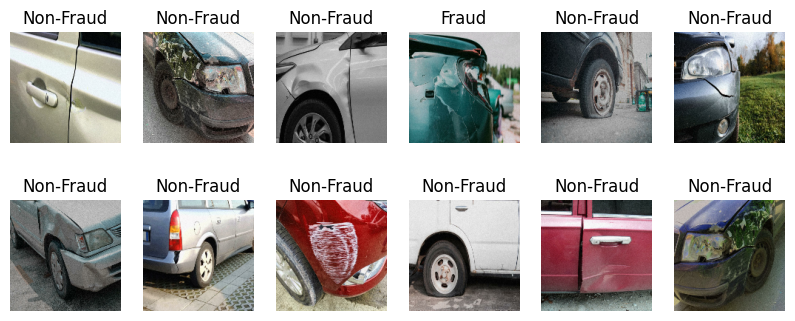

In [11]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(2,6,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

# **Dataset Description**

In [12]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[206.05919   206.05919   208.05919  ]
   [207.3394    207.3394    209.3394   ]
   [208.851     208.851     210.851    ]
   ...
   [236.27199   237.27199   231.27199  ]
   [246.17937   245.17937   240.17937  ]
   [229.47984   229.47984   221.47984  ]]

  [[218.5036    218.5036    220.5036   ]
   [209.6618    209.6618    211.6618   ]
   [219.69      219.69      221.69     ]
   ...
   [245.15094   246.15094   240.15094  ]
   [244.77985   243.77985   238.77985  ]
   [242.48062   242.48062   234.48062  ]]

  [[220.43701   220.43701   222.43701  ]
   [219.981     219.981     221.981    ]
   [214.5       214.5       216.5      ]
   ...
   [248.84995   249.84995   243.84995  ]
   [246.37692   245.37692   240.37692  ]
   [242.67299   242.67299   234.67299  ]]

  ...

  [[212.92197   211.92197   207.92197  ]
   [213.28282   212.28282   208.28282  ]
   [205.68494   204.68494   200.68494  ]
   ...
   [238.94014   237.94014   235.94014  ]
   [222.41641   224.41641   223.41641  ]
   [2

In [13]:
train_data = train_data.map(lambda x,y : (x/255,y))
validation_data = validation_data.map(lambda x,y : (x/255,y))
test_data = test_data.map(lambda x,y : (x/255,y))


In [14]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.51996076 0.64545095 0.69643134]
   [0.43567324 0.56116337 0.61214375]
   [0.43084836 0.54320127 0.6128091 ]
   ...
   [0.20833996 0.28677136 0.48677135]
   [0.2541355  0.33648843 0.512959  ]
   [0.42098364 0.49265966 0.6323298 ]]

  [[0.50603926 0.63152945 0.68250984]
   [0.42360783 0.549098   0.6000784 ]
   [0.36172742 0.47408035 0.5436882 ]
   ...
   [0.25258613 0.3227078  0.46184304]
   [0.29402423 0.36255866 0.5126763 ]
   [0.3933729  0.47075376 0.6156308 ]]

  [[0.47769806 0.6031883  0.65416867]
   [0.44666666 0.57215685 0.62313724]
   [0.24059476 0.3529477  0.4245098 ]
   ...
   [0.09215353 0.12575495 0.14921567]
   [0.05618314 0.08557252 0.12970135]
   [0.18846115 0.24249008 0.30637172]]

  ...

  [[0.5686945  0.48634154 0.36960974]
   [0.4656284  0.38327545 0.26654366]
   [0.4870146  0.39681852 0.2634852 ]
   ...
   [0.57782936 0.6131235  0.6454113 ]
   [0.63083255 0.66612667 0.6984145 ]
   [0.6140645  0.64935863 0.68164647]]

  [[0.6604314  0.60160786 0.511411

# **Model Implementation**

In [15]:
# Adding Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(150, 150, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model = tf.keras.models.Sequential([

    # Data Augmentation
    data_augmentation,

    # Convolutional layers
    tf.keras.layers.Conv2D(64, 3,  activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,472,449 (13.25 MB)

 Trainable params: 3,472,449 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_data,
                    epochs=50,
                    validation_data=validation_data)

Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.9321 - loss: 0.2997 - val_accuracy: 0.9567 - val_loss: 0.1763
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 34s 129ms/step - accuracy: 0.9358 - loss: 0.2386 - val_accuracy: 0.9567 - val_loss: 0.1724
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.9348 - loss: 0.2382 - val_accuracy: 0.9567 - val_loss: 0.1843
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 23s 125ms/step - accuracy: 0.9341 - loss: 0.2373 - val_accuracy: 0.9567 - val_loss: 0.1785
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.9356 - loss: 0.2381 - val_accuracy: 0.9567 - val_loss: 0.1652
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9356 - loss: 0.2312 - val_accuracy: 0.9567 - val_loss: 0.1718
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.9354 - loss: 0.2319 - val_accuracy: 0.9567 - val_loss: 0.1658
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.9357 - loss: 0

# **Model Evaluation**

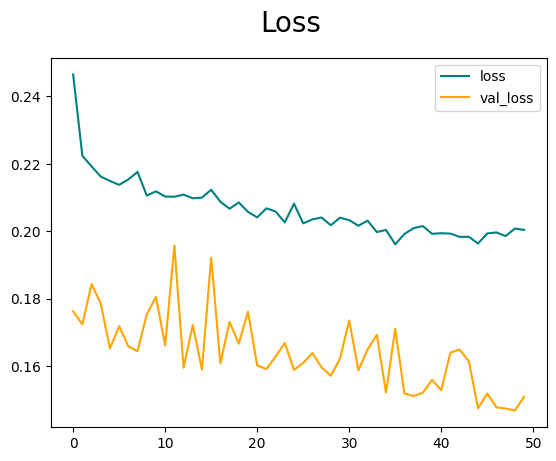

In [19]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

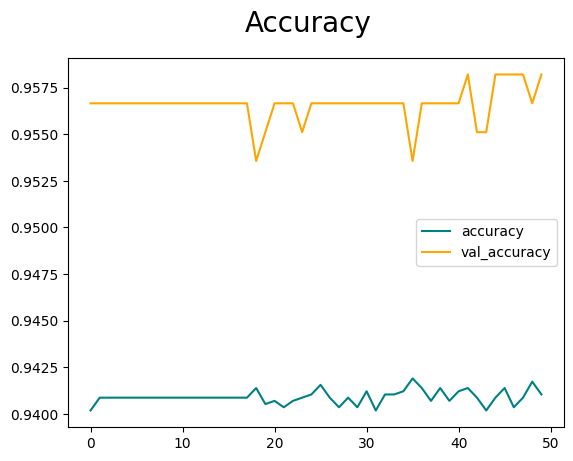

In [20]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [21]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [22]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━

In [23]:
precision.result().numpy(), recall.result().numpy(), accuracy.result().numpy()

(0.9442034, 1.0, 0.9443069)

# **Test Model**

In [24]:
!pip install opencv-python

In [26]:
import cv2

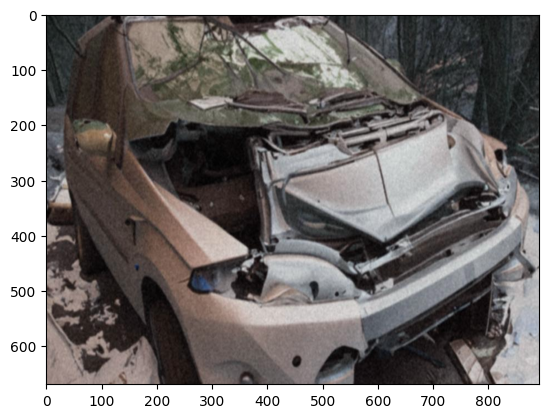

In [27]:
image = cv2.imread('/content/vehicle-insurance-fraud-classification/test/Fraud/1036.jpg')
plt.imshow(image)
plt.show()

In [28]:
resized_image = tf.image.resize(image, Image_size)
scaled_image = resized_image/255

In [29]:
scaled_image

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[0.13854901, 0.15815686, 0.15423529],
        [0.138111  , 0.15771884, 0.15379727],
        [0.13925295, 0.15886079, 0.15493922],
        ...,
        [0.13066778, 0.13851091, 0.14243248],
        [0.14339635, 0.1512395 , 0.1512395 ],
        [0.14553733, 0.15338047, 0.15338047]],

       [[0.18111333, 0.20072117, 0.1967996 ],
        [0.06185569, 0.08146353, 0.07754196],
        [0.16071306, 0.1803209 , 0.17639934],
        ...,
        [0.14646912, 0.15431225, 0.15823382],
        [0.1894051 , 0.19724824, 0.19724824],
        [0.13293286, 0.140776  , 0.140776  ]],

       [[0.16063988, 0.18024772, 0.17632616],
        [0.05917646, 0.07878431, 0.07486274],
        [0.16320261, 0.18281046, 0.17888889],
        ...,
        [0.14469919, 0.15254232, 0.15646389],
        [0.17027259, 0.17811573, 0.17811573],
        [0.13823633, 0.14607947, 0.14607947]],

       ...,

       [[0.5995416 , 0.52503175, 0.5054239 ],
        [0.58

In [30]:
np.expand_dims(scaled_image,0).shape

(1, 150, 150, 3)

In [31]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


In [32]:
y_hat

array([[0.7598979]], dtype=float32)

In [33]:
class_names

['Fraud', 'Non-Fraud']

In [34]:
if y_hat > 0.5:
    print(f'Predicted class is Fraud')
else:
    print(f'Predicted class is Not Fraud')

Predicted class is Fraud


In [35]:
import pickle as pk

In [37]:
pk.dump(model,open('CNNModel.pkl','wb'))